# A SEIR Model in Python

## Overview of the SEIR compartmental model

Compartmental modeling allows for numerical reasoning about epidemics. It was proposed in 1927 by Kermack and McKendrick for mathematical modelling of infectious diseases. The SEIR model divides the population into the following compartments:

* Susceptibles $S$: individuals who are susceptible to the disease and can be infected
* Exposed $E$: individuals who have been exposed to the virus
* Infected $I$: individuals who carry an infection
* Recovered $R$: individuals who have been infected and have recovered and possibly have acquired immunity as well.

Individuals move from one compartment to the other. From the stage of recovered they either have acquired immunity or become susceptible again, depending on the disease. 

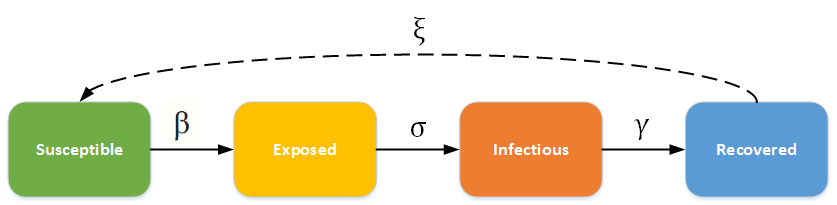
<center>(Image courtesy of the Institute for Disease Modeling)</center>


### Model equations

The model presented here is very simplified. We'll suppose a closed population with no births or deaths and we'll suppose the disease as to be not deadly as well.

\begin{equation}
\frac{d S}{d t} = - \frac{\beta I\cdot S}{N}
\end{equation}

\begin{equation}
\frac{d E}{d t} = \frac{\beta I\cdot S}{N} - \sigma \cdot E
\end{equation}

\begin{equation}
\frac{d I}{d t} = \sigma \cdot E - \gamma \cdot I
\end{equation}

\begin{equation}
\frac{d R}{d t} = \gamma \cdot I
\end{equation}

$N$ = $S$ + $E$ + $I$ + $R$ is the total population.

### Model parameters

* $\beta$ is the infectious rate. It represents the probability of transmitting disease between a susceptible and an infectious individual.
* $\sigma$ is the incubation rate, thus the rate of latent individuals becoming infectious. 
* $\gamma$ is the recovery rate

These parameters are expressed as the reciprocal of a time expressed in days. The model implemented here is time based in days, while other implementations may have different time-bases as, for example, years.

The basic reproduction number $R_0$ is the most important derived parameter. It represents the average number of new infections due to an infected individual, assuming the whole population is susceptible: it is given by

\begin{equation}
R_0 = \frac{\beta}{\gamma}
\end{equation}

mesleas, which is a quite infectious disease, has an $R_0$ of $\simeq 11$ 


Note that:

\begin{equation}
\frac{d E}{d t} + \frac{d I}{d t} = \gamma \left(\frac{\beta S I}{\gamma N} - I\right)
\end{equation}

which tells us that a *growth* of the infection requires a positive term on the right-hand side of the equation, which leads us to define an effective reproduction number.

\begin{equation}
{\cal R}(t) \equiv \frac{\beta S(t)}{\gamma N}
\end{equation}


The effective reproduction number depends on the susceptible population $S$, which gets reduced by the epidemics. After recovery, infected individuals account to the compartment $R$ of recovered individuals, who are immune. Therefore, at a steady state we have  ${\cal R} \simeq 1$.
















## Running the model

We are going to run the model over a realistic, albeit hypothetical, scenario. First of all we are going to load the Python module containing the module implementation.

In [16]:
%run SEIR.py

Then, we are going to set the parameters. We'll suppose a small community of 1000 individuals sensitive to the virus. At the initial conditions, 100 of them have been exposed to the infection. We'll set $\sigma = \gamma = 0.04762$ which corresponds to an incubation time of 21 days ( $\frac{1}{21} = 0.04762$), same as the infectious time. Recalling that 

\begin{equation}
R_0 = \frac{\beta}{\gamma}
\end{equation}

we'll assume $R_0 = 3.8$ (our hypothesis is of a very infectios disease albeit less infectious than measles), then we'll have $\beta = 0.18$. We'll finally set $dt=0.001$ thus small enaugh to achieve a good convergence, and a time frame of $250$ days.

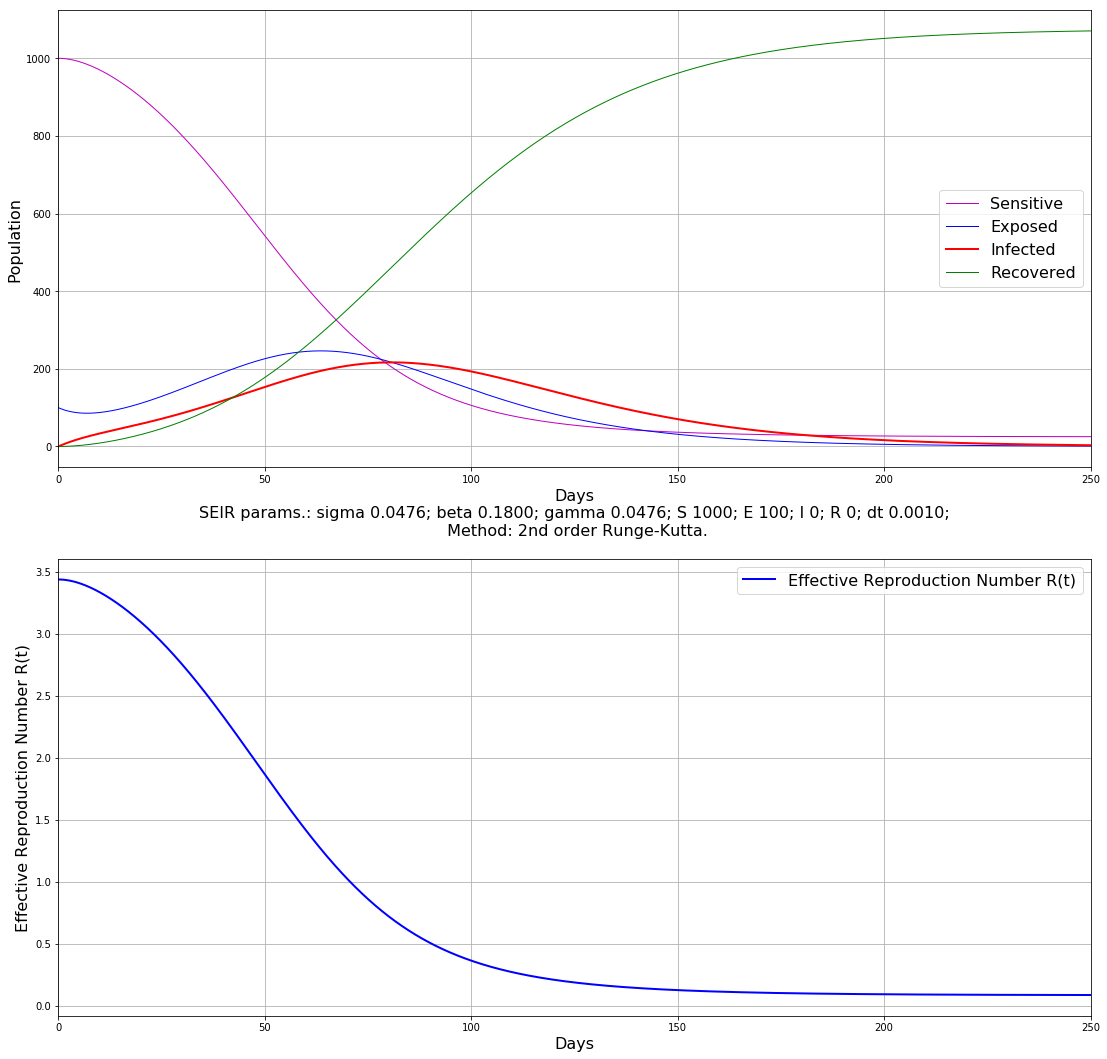

In [17]:
# Set up the model
#
s = Simulation(  S=1000
               , E=100
               , I=0
               , R=0               
               , beta=0.18
               , sigma=0.04762
               , gamma=0.04762
               , dt=0.001
               , start=0
               , end=250)

# Run the simulation
#
s.run_simulation()

# Show the charts
#
%matplotlib inline

The infected's curve reaches its peak about 90 days after day 0, then decreases. Let's now set up a different scenario. Let's suppose absence of containment measures, so 500 people were initially exposed, instead of 100. So E is the only parameter we are going to change.  

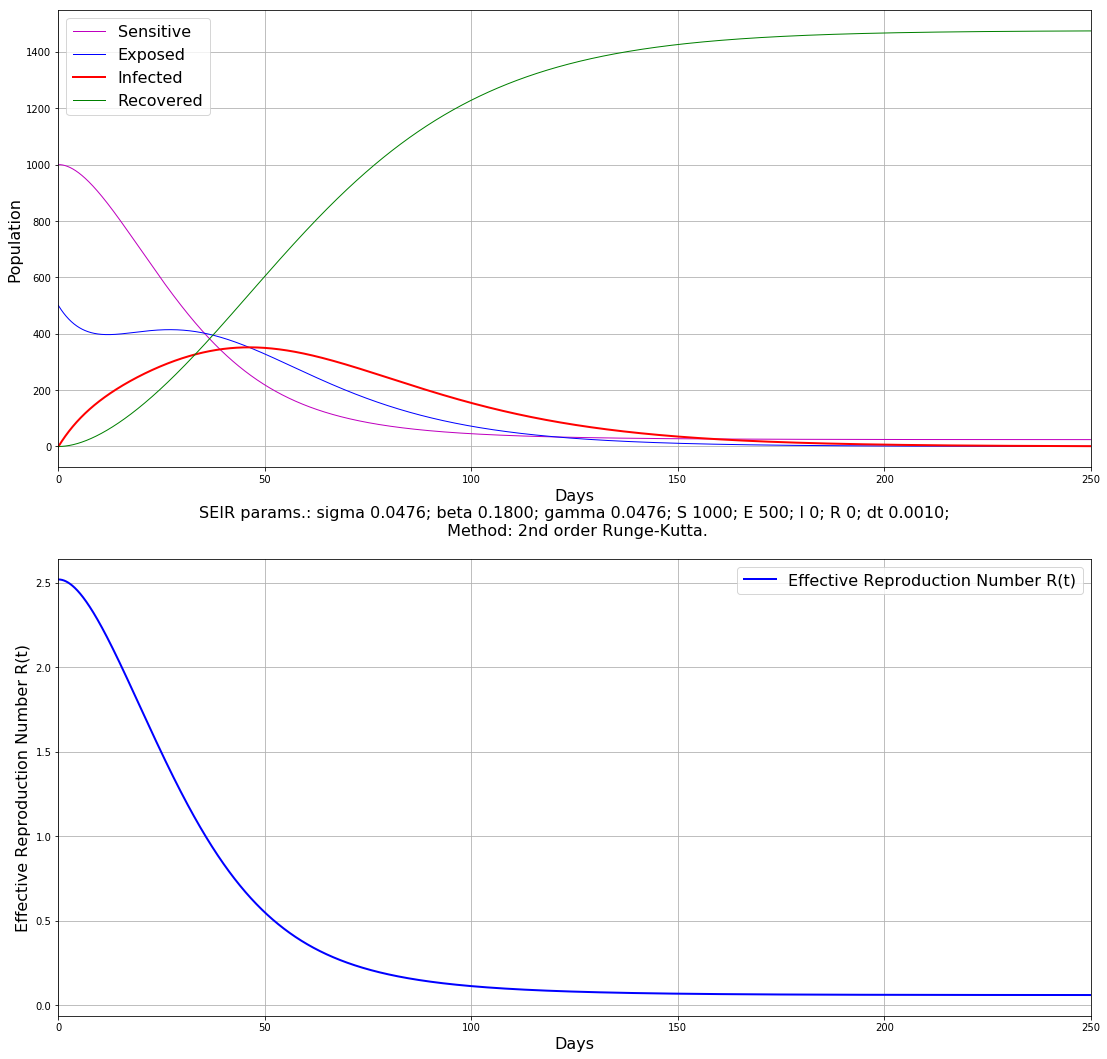

In [13]:
# Set up the model
#
s = Simulation(  S=1000
               , E=500
               , I=0
               , R=0               
               , beta=0.18
               , sigma=0.04762
               , gamma=0.04762
               , dt=0.001
               , start=0
               , end=250)

# Run the simulation
#
s.run_simulation()

# Show the charts
#
%matplotlib inline

In this last scenario we have an almost sudden raise of the Infected's curve, reaching its peak about only 50 days from day 0. Also, we'll have many more infected people in a shorter period of time. That's definitely a worst situation in comparison to the one of the first scenario.

# Conclusions

From the chart we may see with ease that the model shows the expected behvior. The effective reproduction number declines progressively and steadily. The epidemics will reach its peak on correspondance of $R(t) = 1$. When $R(t)$ declines below $1$, also the infection declines and progressively fades away.

The SEIR model also shows the effectiveness of isolation measures directed on keeping the number of Exposed individuals as low as possible. This allows a smooth slope on the Infected's curve, allowing more time to take action and an overall number of infected people much lower than the one we may have otherwise.

Please keep in mind that the epidemiological parameters and the subsequent charts presented here are demonstrative and have the only purpose to show the dynamics of epidemiological diseases from a qualitative and numerical perspective and in no way they represent any real world scenario. This document and the Python code presented here have been written solely for study and research purposes. 

# References

https://institutefordiseasemodeling.github.io/Documentation/

https://institutefordiseasemodeling.github.io/Documentation/general/model-seir.html

<a href="https://academic.oup.com/bmb/article/62/1/187/281114">Almut Scherer, Angela McLean - Mathematical models of vaccination</a> 

<a href="http://tnt.phys.uniroma1.it/twiki/pub/TNTgroup/AngeloVulpiani/runge.pdf">William H. Press, Saul A. Teukolsky, William T. Vetterling, Brian P. Flannery - Numerical Recipes in C: The Art of Scientific Computing - Cambridge University Press</a>

<a href="https://www.uniurb.it/insegnamenti-e-programmi/253972">Andrea Vicerè - Corso di Simulazione Numerica</a>


